In [1]:
import psycopg2
from sqlalchemy import create_engine
from configparser import ConfigParser
from pathlib import Path
import os
import io
import pandas as pd

In [2]:
config = ConfigParser()
file = '../Notebooks/config.ini'
config.read(file)

USER_BASE = config['database']['user']
PASSWORD_BASE = config['database']['passw']
DATABASE = config['database']['db']
PORT = config['database']['port']
HOST = config['database']['host']

In [3]:
def conn():
    connetion = psycopg2.connect(host=HOST, dbname=DATABASE, user=USER_BASE, password=PASSWORD_BASE)
    conn = connetion.raw_connection()
    return conn
    

In [4]:
datos = pd.read_csv('D:\\emissionsmap\\SubirData\\Normalizados\\Tabla_Hecho.csv')

In [5]:
datos.head()

,Año,País,Combustible,Continente,Id_Año,Id_País,Id_Combustible,Id_Continente
0,1965,World,Biomass,País,d46e1fcf4c07ce4a69ee07e4134bcef1,f5a7924e621e84c9280a9a27e1bcb7f6,57a34c10edc9db4cc4fbfc06367285f8,f0aa1982f61314b9aab258c2f110ebab
1,1966,Afghanistan,Coal,Código,3683af9d6f6c06acee72992f2977f67e,6e9767f4f15357401b148b9a8ced14ef,ff8cfc4e6a79e6514be2533a5f5506ad,c54e67f2ff1683617c1edadad20f99bb
2,1967,Albania,Cogeneration,Año,a82d922b133be19c1171534e6594f754,c420ddff824a5c0eec70dd23d62496bc,be8c640ab7313b88c232af9328ebf5a8,c55baca5e562cecdd18fb070c0ff8f80
3,1968,Algeria,Gas,Combustibles Fósiles (% Energía Primaria Equiv...,98c7242894844ecd6ec94af67ac8247d,575b9408b6daa2ddcefbcf6d81c9b4c9,635459702f9817de29e608fa3395637c,50a5739c47db56022e3798a1f85637cd
4,1969,American Samoa,Geothermal,Renovables (% Energía Primaria Equivalente),4d8556695c262ab91ff51a943fdd6058,b86f99753a08d00fa3ca946d07ecac29,3f3f7ddaa26a792f9707f4de5f077cf3,af1b6e0ed591be5893f58516a3f64119


In [6]:
def cargarTablas(data, nombre):
    create_connection = f'postgresql+psycopg2://{USER_BASE}:{PASSWORD_BASE}@{HOST}:{PORT}/{DATABASE}'
    engine = create_engine(create_connection)

    data.head(0).to_sql(nombre, engine, if_exists='replace',index=False) #drops old table and creates new empty table

    conn = engine.raw_connection()
    cur = conn.cursor()
    output = io.StringIO()
    data.to_csv(output, sep='\t', header=False, index=False)
    output.seek(0)
    contents = output.getvalue()
    cur.copy_from(output, nombre, null='')
    
    return('Tabala cargadas Exitosamente')

In [15]:
def consultas(consulta):
    try:
        connetion = psycopg2.connect(host=HOST, dbname=DATABASE, user=USER_BASE, password=PASSWORD_BASE)
        micursor = connetion.cursor()
        micursor.execute(consulta)
        column_names = [desc[0] for desc in micursor.description]
        df = micursor.fetchall()
        df = list(df)
        df = pd.DataFrame(df)
        n=0
        for i in df.columns:
            df.rename(columns={i:column_names[n]}, inplace=True)
            n+=1
                    
    except Exception as error:
        print(error)
    finally:
        if micursor is not None:
            micursor.close()
        if connetion is not None:
            connetion.close()
        return df

In [8]:
cargarTablas(datos, 'prueba')

'Tabala cargadas Exitosamente'

In [16]:
df = consultas('SELECT * FROM gases') #consulta de tablas


In [18]:
df

,Año,Medios N20,Unc N2O,Medios Sf6,Unc Sf6,Medios De Co2,Unc Co2,Medios Canal 4,Unc Ch4,Id_Año
0,2001,316.36,0.14,4.78,0.004,371.32,0.12,1771.24,0.53,d0fb963ff976f9c37fc81fe03c21ea7b
1,2002,316.94,0.12,4.98,0.003,373.45,0.12,1772.69,0.55,4ba29b9f9e5732ed33761840f4ba6c53
2,2003,317.63,0.12,5.23,0.002,375.98,0.12,1777.31,0.52,a591024321c5e2bdbd23ed35f0574dde
3,2004,318.26,0.12,5.45,0.002,377.70,0.12,1777.03,0.46,b8b4b727d6f5d1b61fff7be687f7970f
4,2005,318.91,0.10,5.67,0.002,379.98,0.12,1774.14,0.55,d47268e9db2e9aa3827bba3afb7ff94a
...,...,...,...,...,...,...,...,...,...,...
58,1993,NaN,NaN,NaN,NaN,357.21,0.12,1736.49,0.44,c5a4e7e6882845ea7bb4d9462868219b
59,1994,NaN,NaN,NaN,NaN,358.96,0.12,1742.06,0.63,008bd5ad93b754d500338c253d9c1770
60,1995,NaN,NaN,NaN,NaN,360.97,0.12,1748.80,0.47,3f088ebeda03513be71d34d214291986
61,1996,NaN,NaN,NaN,NaN,362.74,0.12,1751.46,0.63,6351bf9dce654515bf1ddbd6426dfa97


In [24]:
from raceplotly.plots import barplot

<AxesSubplot:>

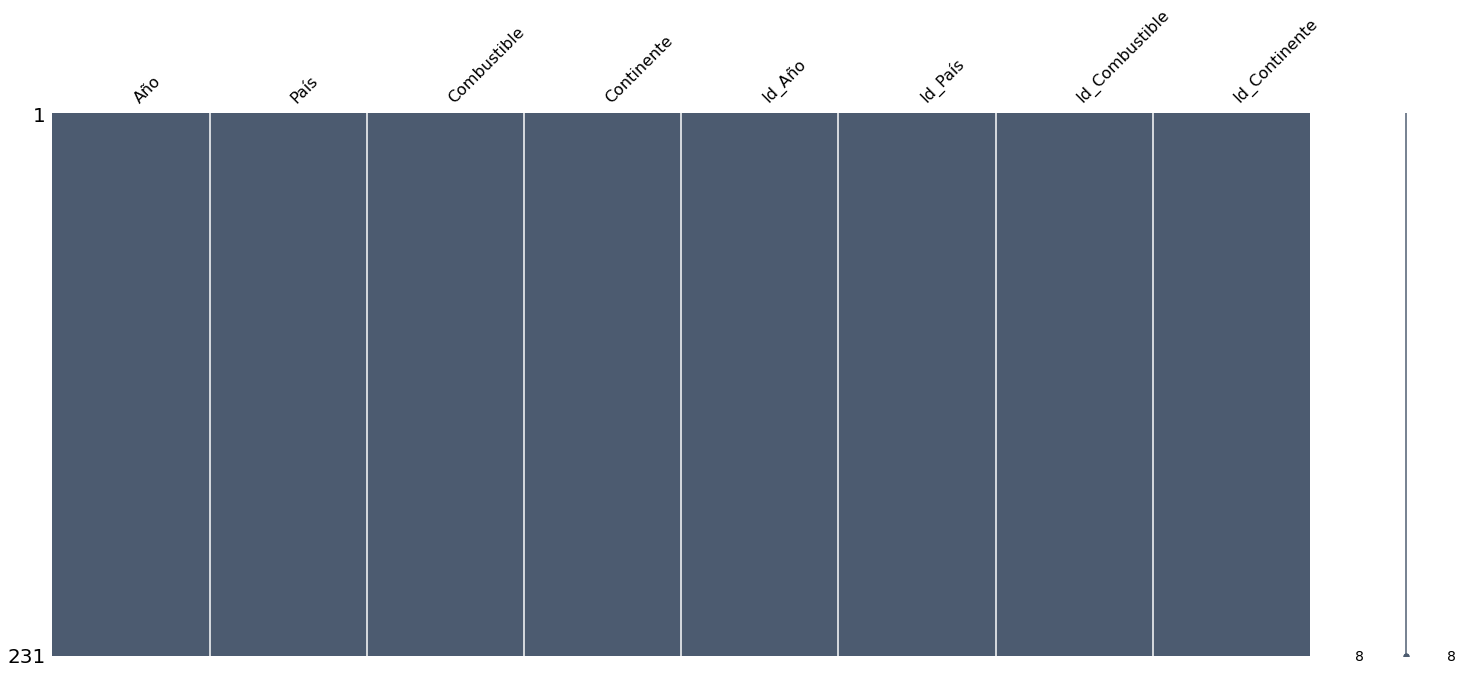

In [14]:
import missingno as msno
msno.matrix(datos,color=(0.3,0.36,0.44))